<h2><center>THE CHINESE UNIVERSITY OF HONG KONG<br /> 
    Department of Mathematics<br />
 MATH4280<br />
    Innovation and Design in Big Data Analytics</center></h2>

# LAB ASSIGNMENT ACTIVITY 8

# Question 1

In this question, we will use neural network to fit a linear regression problem. Given 100 data x, and y where
$$y= ax+b+e$$
Here, $e$ is the noise. Then we want to find the value of the coefficient $a$ and $b$. The data $x$ is between 0 and 1.The coefficient $a$ and $b$ are between -10 and 10. There are in total 500 data.

First, we have the following data

In [1]:
!pip install latexify-py

Defaulting to user installation because normal site-packages is not writeable


\mathrm{noisy\_linear}(a, b, x) = a x + b + \mathrm{np}.\mathrm{random}.\mathrm{rand} \mathopen{}\left( 100 \mathclose{}\right).\mathrm{astype} \mathopen{}\left( \textrm{"float32"} \mathclose{}\right) \cdot 0.3
<class 'latexify.ipython_wrappers.LatexifiedFunction'>
[160, 146, 85, 405, 343, 245, 429, 85, 386, 216]


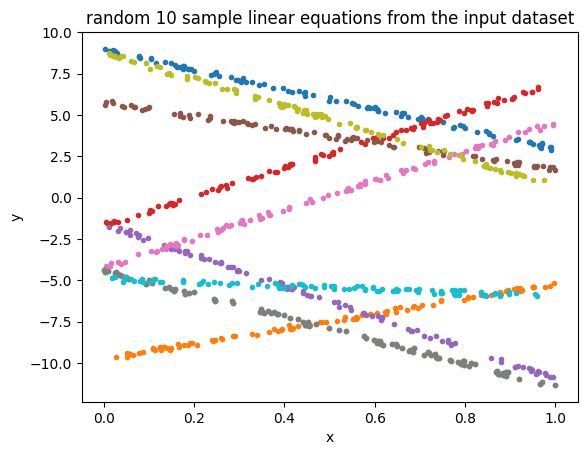

In [2]:
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random

from IPython.display import display, Math

import latexify

np.random.seed(1234)

# The coefficient a and b area between -10 and 10. 
# set 500 different combinations of a and b.
a,b = np.random.rand(500).astype('float32')*20.0-10.0, np.random.rand(500).astype('float32')*20.0-10.0

data_input = np.empty((500,200))
np.random.seed(None)


"""
Original problem:

Input data: 
Given a set of data points (x_i, y_i), i=1,...,n, 

The size of the set is, m = 500 (bigger than n to make it over-determined), 
n = 200 (100 points for x and 100 points for y. Totally 100 points in the figure)

Output data: 
Use neural network to predict the best linear model y = ax + b + e
where e is the noise.
"""
@latexify.function
def noisy_linear(a,b,x):
    return a*x + b + np.random.rand(100).astype('float32')*0.3

print(noisy_linear)
print(type(noisy_linear))

# 1. Create the set of data points (x_i, y_i), i=1,...,n, 
# For each combination of a and b, generate 100 points of x and y
for i,value_a, value_b in zip(range(500),a,b):
    x= np.random.rand(100).astype('float32')
    # define y = ax + b + noise (e)
    y= noisy_linear(value_a, value_b,x)
    data_input[i]= np.hstack((x.reshape(1,100), y.reshape(1,100)))

# To store all the output values (y) for each input values (x) in a single matrix, 
# the code reshaping `a` and `b` as column vector and then horizontally stacks them together
data_output = np.hstack((a.reshape(500,1), b.reshape(500,1)))

X_train, X_test, y_train, y_test = train_test_split(data_input, data_output, test_size=0.33)

#sampling 2 random samples from the dataset: 
total_columns = data_input.shape[0]
# generate 3 column numbers between 0 and total_columns

num_of_samples = 10 

random_numbers = []
for _ in range(num_of_samples):
    random_number = random.randint(0, 499)
    random_numbers.append(random_number)

print(random_numbers)

for i in range(len(random_numbers)):
    row_of_record = random_numbers[i]
    plt.scatter(data_input[row_of_record,:100],data_input[row_of_record,100:],marker='.')
plt.title(f'random {len(random_numbers)} sample linear equations from the input dataset')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## Mathematical equation involved: 

In [3]:
noisy_linear

Input and output dataset:

![image (3) - Copy.png](<attachment:image (3) - Copy.png>)

Each row of this pair of matrices is an individual record that to be feed into the model. 

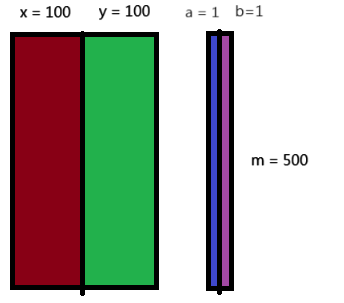

## Q1a

Make a neural network model using the $(x,y)$ input data to predict the coefficient data $a,b$ such that the MSE value is less than $22$. 

Notice that each training input should be a 1D array of size $200$.

Train with `validation_split=0.1`, epochs within $200$ and `batch_size = 32`.

You can use at most $2$ layers (excluding the output layer) with less than $100$ units on each layer.


In [4]:
print(data_input.shape, data_output.shape) 

# Here, we have 500 samples, 
# each sample has 200 features (100 for x and 100 for y)

(500, 200) (500, 2)


## I cannot find a method that reduce validation error lower than acceptable values for this problem. 

## Below I try to demonstrate each methods I have tried: 

## Trial 1 of 5 for Q1: Manually assign hyperparameters for the neural network

In [5]:
## answer 1a
from keras.optimizers import SGD  # Import SGD optimizer from the keras.optimizers module
from keras.models import Sequential
from keras.layers import Dense


from sklearn.model_selection import train_test_split

unit = 10 # this value should be the number of neurons in the layer
input_shape = 200 # this value should be the number of features in your dataset

# define the model
model = Sequential()
# input layer 
model.add(Dense(units=100, activation='relu', kernel_initializer='he_normal', input_shape=(data_input.shape[1],))) # data_input.shape[1] = 200
# hidden layer
model.add(Dense(units=16, activation='relu', kernel_initializer='he_normal',))
# hidden layer
model.add(Dense(units=data_output.shape[1])) #　data_output.shape[1] =  2 

print(model.summary())

2023-11-16 04:16:49.717064: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-16 04:16:49.748765: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-16 04:16:49.748798: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-16 04:16:49.749630: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-16 04:16:49.754544: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-16 04:16:49.755042: I tensorflow/core/platform/cpu_feature_guard.cc:1

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               20100     
                                                                 
 dense_1 (Dense)             (None, 16)                1616      
                                                                 
 dense_2 (Dense)             (None, 2)                 34        
                                                                 
Total params: 21750 (84.96 KB)
Trainable params: 21750 (84.96 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


2023-11-16 04:16:51.337790: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-11-16 04:16:51.345072: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2256] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [6]:
from keras.callbacks import History  # Import History callback
import tensorflow

# compile the model(defining loss function for the NN)
# opt = SGD(learning_rate=0.01, momentum=0.9)
adam_optimizer = tensorflow.keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=adam_optimizer, loss='mse', metrics=['accuracy'])
# Preprocess the data (optional)
X_train, X_test, y_train, y_test = train_test_split(data_input, 
                                                    data_output, 
                                                    test_size=0.2)

# Create a History callback to record loss values
history = History()

# train the model
model.fit(X_train, 
          y_train, 
          validation_data=(X_test, y_test), 
          validation_split=0.1,
          epochs=200, 
          batch_size=32,
          callbacks=[history],)

Epoch 1/200


13/13 [==============================] - 1s 12ms/step - loss: 64.5825 - accuracy: 0.5350 - val_loss: 26.2071 - val_accuracy: 0.6000
Epoch 2/200
13/13 [==============================] - 0s 3ms/step - loss: 28.3058 - accuracy: 0.5275 - val_loss: 27.7187 - val_accuracy: 0.6600
Epoch 3/200
13/13 [==============================] - 0s 3ms/step - loss: 27.6883 - accuracy: 0.6200 - val_loss: 25.8210 - val_accuracy: 0.6400
Epoch 4/200
13/13 [==============================] - 0s 2ms/step - loss: 26.2574 - accuracy: 0.6425 - val_loss: 26.1937 - val_accuracy: 0.6700
Epoch 5/200
13/13 [==============================] - 0s 3ms/step - loss: 26.3032 - accuracy: 0.6150 - val_loss: 26.6455 - val_accuracy: 0.6500
Epoch 6/200
13/13 [==============================] - 0s 3ms/step - loss: 27.5224 - accuracy: 0.6225 - val_loss: 24.2840 - val_accuracy: 0.6400
Epoch 7/200
13/13 [==============================] - 0s 3ms/step - loss: 24.5073 - accuracy: 0.6325 - val_loss: 23.5376 - val_accuracy: 0.6500
Epoch 8/20

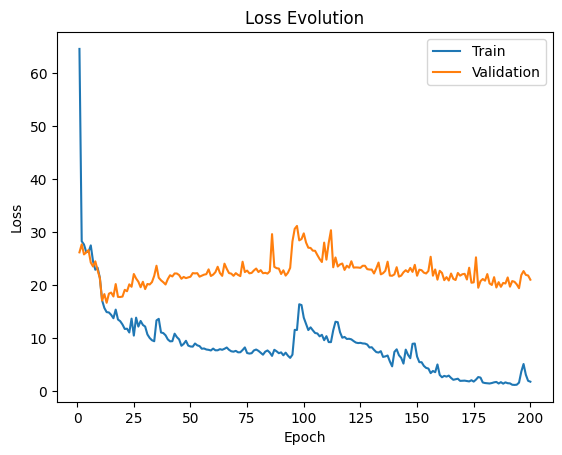

In [7]:
# evaluate the model (optional)
# Get the recorded loss values from history
loss_values = history.history['loss']
val_loss_values = history.history['val_loss']

# Create a figure and axis
fig, ax = plt.subplots()

# Plot the loss values
ax.plot(range(1, len(loss_values) + 1), loss_values)
ax.plot(range(1, len(val_loss_values) + 1), val_loss_values)
plt.legend(['Train', 'Validation'], loc='upper right')

# Set the plot title and labels
ax.set_title('Loss Evolution')
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')

# Show the plot
plt.show()

Loss in the last loop (within training set data):

In [8]:
loss_values[-1]

1.8099271059036255

Evaluate the neural network with test set data:

In [9]:
loss = model.evaluate(X_test, y_test)
print(loss)

4/4 [==============================] - 0s 1ms/step - loss: 21.0486 - accuracy: 0.5500
[21.04864501953125, 0.550000011920929]


In [10]:
yhat = model.predict(X_test)
print(yhat.shape)
print(yhat)

4/4 [==============================] - 0s 1ms/step
(100, 2)
[[ 1.8060789   0.36958456]
 [-1.2041259   0.09999466]
 [-6.168736    3.8930848 ]
 [ 3.5409303   7.095306  ]
 [ 1.0094638  -1.7694316 ]
 [ 0.6775062  -0.8858886 ]
 [-1.1337357   0.8501153 ]
 [ 4.60244    -1.9897103 ]
 [-4.9027133  -6.2496037 ]
 [-2.8431468  -0.587872  ]
 [-1.6644812   7.7537446 ]
 [-3.0859241   5.2271843 ]
 [ 3.5409303   7.095306  ]
 [ 1.2720311   7.382302  ]
 [ 2.5579085  -4.405804  ]
 [-2.755073   -2.1391406 ]
 [-0.05148649  0.28239775]
 [ 3.6874928   2.7723527 ]
 [ 1.607045    7.3399253 ]
 [ 5.258766    1.041728  ]
 [-7.4814057   8.489534  ]
 [ 2.3266196  -3.9884706 ]
 [ 1.1954386  -2.9913163 ]
 [ 3.493296    6.3490567 ]
 [ 2.0095398   2.1754503 ]
 [ 3.5409303   7.095306  ]
 [ 4.0079293   0.74217844]
 [-6.1376166  -9.391745  ]
 [ 2.0399215   2.3776512 ]
 [ 2.8264537   2.2030191 ]
 [ 3.5409303   7.095306  ]
 [ 3.3165145  -4.4993215 ]
 [-8.649139   -8.184917  ]
 [-5.8745112  -7.079086  ]
 [-3.687985   -6.53925

## Q1b

Given the following $(x,y)$ data, plot the best fit line predicted by your model along with the given data.

1/1 [==============================] - 0s 15ms/step


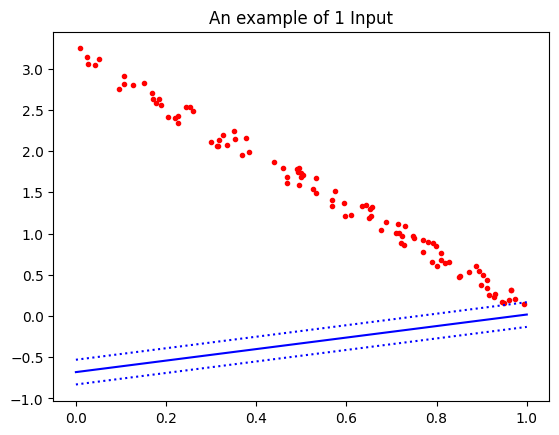

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Set the random seed
np.random.seed(12345)

# Initialize independent input linear equation (x_i, y_i)
x = np.random.rand(100).astype('float32')
y = -3 * x + 3 + np.random.rand(100).astype('float32') * 0.3

# Set input data to be (1,200) to fit the input layer of the neural network
x_test = np.hstack((x.reshape(1, 100), y.reshape(1, 100)))

# Put the test data into the model to predict the output
yhat = model.predict(x_test)

# Best fit line assuming e = 0. Construct the best fit line with y = Ax + b
# Set up x value range
x_bfl = np.linspace(0, 1, 100)

# Calculate corresponding y value range for the best fit line: y = Ax + b
y_bfl = x_bfl * yhat[0][0] + yhat[0][1]

# Calculate the parallel lines by adding/subtracting the random noise term
y_parallel_plus = y_bfl + 0.3/2
y_parallel_minus = y_bfl -  0.3/2

# Plot the test dataset
plt.scatter(x, y, marker='.', color='red')

# Plot the best fit line as a straight line
plt.plot(x_bfl, y_bfl, color='blue')

# Plot the parallel lines as dotted lines
plt.plot(x_bfl, y_parallel_plus, linestyle='dotted', color='blue')
plt.plot(x_bfl, y_parallel_minus, linestyle='dotted', color='blue')

plt.title('An example of 1 Input')
plt.show()

## Trial 2 of 5 of Q1: Using RandomSearch optimized hyperparameter provided by Karas Tuner:

Reference: https://www.tensorflow.org/tutorials/keras/keras_tuner

In [12]:
!pip install keras-tuner

Defaulting to user installation because normal site-packages is not writeable


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.9/128.9 kB 6.8 MB/s eta 0:00:00


In [13]:
from kerastuner.tuners import RandomSearch
import tensorflow.keras.layers as layers
import tensorflow.keras as keras

def build_model(hp):
    model = keras.Sequential()
    # Input layer 
    model.add(layers.Dense(units=hp.Int('units_input',
                                        min_value=2,
                                        max_value=100,
                                        step=32),
                           activation=hp.Choice('activation_input',
                                                values=['relu', 'tanh', 'sigmoid']),
                           input_shape=(input_shape,))) # use input_shape as the input_dim
    # Hidden layers
    for i in range(hp.Int('num_layers', 1, 3)): # generate 1 to 3 hidden layers
        model.add(layers.Dense(units=hp.Int('units_' + str(i),
                                            min_value=2,
                                            max_value=100,
                                            step=32),
                               activation=hp.Choice('activation_' + str(i),
                                                    values=['relu', 'tanh', 'sigmoid'])))
    # Output layer
    model.add(layers.Dense(units = data_output.shape[1])) # output layer has 2 neurons for two coefficients a and b
    model.compile(
        optimizer=keras.optimizers.Adam(hp.Choice('learning_rate',
                                                  values=[1e-2, 1e-3, 1e-4])),
        loss='mse', # we use mean squared error as loss function for regression problem
        metrics=['mae']) # we use mean absolute error as a metric for regression problem
    return model

tuner = RandomSearch(
    build_model,
    objective='val_mae', # we use validation mean absolute error as the objective to minimize
    max_trials=5,
    executions_per_trial=3,
    directory='my_dir',
    project_name='helloworld')

tuner.search(X_train, y_train,
             epochs=5,
             validation_data=(X_test, y_test))

Trial 5 Complete [00h 00m 03s]
val_mae: 4.862752278645833

Best val_mae So Far: 3.2935935656229653
Total elapsed time: 00h 00m 15s


In [14]:
# Get the optimal hyperparameters
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is {best_hps.get('units_input')} with {best_hps.get('activation_input')} as the activation function and the optimal learning rate for the optimizer
is {best_hps.get('learning_rate')}.
""")

# Print the complete setup for the hidden layers
print(f"The optimal number of hidden layers is {best_hps.get('num_layers')}.")

# You can also print out other parameters
for i in range(best_hps.get('num_layers')):
    print(f"The optimal number of units in layer {i+1} is {best_hps.get('units_' + str(i))} with {best_hps.get('activation_' + str(i))} activation function.")


The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is 66 with tanh as the activation function and the optimal learning rate for the optimizer
is 0.001.

The optimal number of hidden layers is 2.
The optimal number of units in layer 1 is 98 with tanh activation function.
The optimal number of units in layer 2 is 34 with relu activation function.


In [15]:
## answer 1a
from keras.optimizers import SGD  # Import SGD optimizer from the keras.optimizers module
from keras.models import Sequential
from keras.layers import Dense


from sklearn.model_selection import train_test_split

unit = 10 # this value should be the number of neurons in the layer
input_shape = 200 # this value should be the number of features in your dataset

# define the model
model = Sequential()
# input layer 
model.add(Dense(units=34, activation='sigmoid', kernel_initializer='he_normal', input_shape=(data_input.shape[1],))) # data_input.shape[1] = 200
# hidden layer
model.add(Dense(units=98, activation='sigmoid', kernel_initializer='he_normal',))
# hidden layer
model.add(Dense(units=data_output.shape[1])) #　data_output.shape[1] =  2 

print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 34)                6834      
                                                                 
 dense_5 (Dense)             (None, 98)                3430      
                                                                 
 dense_6 (Dense)             (None, 2)                 198       
                                                                 
Total params: 10462 (40.87 KB)
Trainable params: 10462 (40.87 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [16]:
from keras.callbacks import History  # Import History callback

# compile the model(defining loss function for the NN)
# opt = SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer='adam', loss='mse', metrics=['accuracy']) #mse: mean squared error

# Preprocess the data (optional)
X_train, X_test, y_train, y_test = train_test_split(data_input, 
                                                    data_output, 
                                                    test_size=0.2)

# Create a History callback to record loss values
history = History()

# train the model
model.fit(X_train, 
          y_train, 
          validation_data=(X_test, y_test), 
          validation_split=0.1,
          epochs=200, 
          batch_size=32,
          callbacks=[history],)

Epoch 1/200


13/13 [==============================] - 1s 9ms/step - loss: 33.6340 - accuracy: 0.4800 - val_loss: 30.0509 - val_accuracy: 0.5300
Epoch 2/200
13/13 [==============================] - 0s 3ms/step - loss: 28.8753 - accuracy: 0.6250 - val_loss: 27.5306 - val_accuracy: 0.6400
Epoch 3/200
13/13 [==============================] - 0s 2ms/step - loss: 26.4398 - accuracy: 0.6450 - val_loss: 25.7519 - val_accuracy: 0.6400
Epoch 4/200
13/13 [==============================] - 0s 2ms/step - loss: 24.5758 - accuracy: 0.6425 - val_loss: 24.3311 - val_accuracy: 0.6400
Epoch 5/200
13/13 [==============================] - 0s 2ms/step - loss: 23.1851 - accuracy: 0.6425 - val_loss: 23.2605 - val_accuracy: 0.6400
Epoch 6/200
13/13 [==============================] - 0s 2ms/step - loss: 22.1772 - accuracy: 0.6400 - val_loss: 22.4311 - val_accuracy: 0.6400
Epoch 7/200
13/13 [==============================] - 0s 2ms/step - loss: 21.3958 - accuracy: 0.6450 - val_loss: 21.7431 - val_accuracy: 0.6400
Epoch 8/200

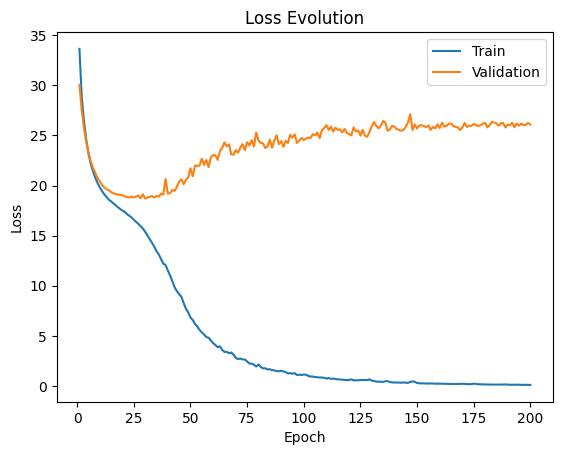

In [17]:
# evaluate the model (optional)
# Get the recorded loss values from history
loss_values = history.history['loss']
val_loss_values = history.history['val_loss']

# Create a figure and axis
fig, ax = plt.subplots()

# Plot the loss values
ax.plot(range(1, len(loss_values) + 1), loss_values)
ax.plot(range(1, len(val_loss_values) + 1), val_loss_values)
plt.legend(['Train', 'Validation'], loc='upper right')

# Set the plot title and labels
ax.set_title('Loss Evolution')
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')

# Show the plot
plt.show()

1/1 [==============================] - 0s 35ms/step


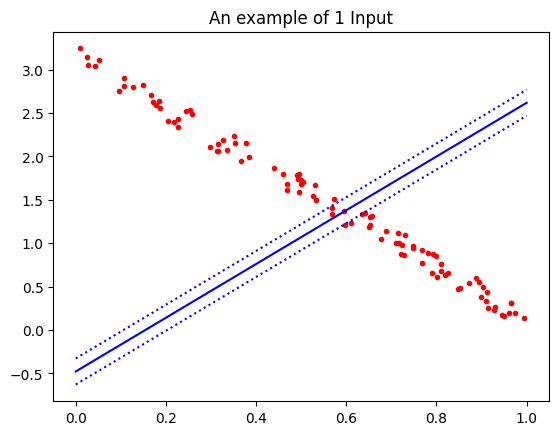

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# Set the random seed
np.random.seed(12345)

# Initialize independent input linear equation (x_i, y_i)
x = np.random.rand(100).astype('float32')
y = -3 * x + 3 + np.random.rand(100).astype('float32') * 0.3

# Set input data to be (1,200) to fit the input layer of the neural network
x_test = np.hstack((x.reshape(1, 100), y.reshape(1, 100)))

# Put the test data into the model to predict the output
yhat = model.predict(x_test)

# Best fit line assuming e = 0. Construct the best fit line with y = Ax + b
# Set up x value range
x_bfl = np.linspace(0, 1, 100)

# Calculate corresponding y value range for the best fit line: y = Ax + b
y_bfl = x_bfl * yhat[0][0] + yhat[0][1]

# Calculate the parallel lines by adding/subtracting the random noise term
y_parallel_plus = y_bfl + 0.3/2
y_parallel_minus = y_bfl -  0.3/2

# Plot the test dataset
plt.scatter(x, y, marker='.', color='red')

# Plot the best fit line as a straight line
plt.plot(x_bfl, y_bfl, color='blue')

# Plot the parallel lines as dotted lines
plt.plot(x_bfl, y_parallel_plus, linestyle='dotted', color='blue')
plt.plot(x_bfl, y_parallel_minus, linestyle='dotted', color='blue')

plt.title('An example of 1 Input')
plt.show()

## Trial 3 of 5: Neural network layers with L1 and L2 regularization

In [19]:
## answer 1a
from keras.optimizers import SGD  # Import SGD optimizer from the keras.optimizers module
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf


from sklearn.model_selection import train_test_split

unit = 10 # this value should be the number of neurons in the layer
input_shape = 200 # this value should be the number of features in your dataset

# define the model
model = Sequential()
# input layer 
model.add(keras.Input(data_input.shape[1])) 
model.add(Dense(units=100, 
                activation='relu', 
                kernel_initializer='he_normal', 
                kernel_regularizer=tf.keras.regularizers.L1(0.01),
                activity_regularizer=tf.keras.regularizers.L2(0.01)))
# hidden layer
model.add(Dense(units=16, 
                activation='relu', 
                kernel_initializer='he_normal', 
                kernel_regularizer=tf.keras.regularizers.L1(0.01),
                activity_regularizer=tf.keras.regularizers.L2(0.01)))
# hidden layer
model.add(Dense(units=data_output.shape[1])) #　data_output.shape[1] =  2 

print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 100)               20100     
                                                                 
 dense_8 (Dense)             (None, 16)                1616      
                                                                 
 dense_9 (Dense)             (None, 2)                 34        
                                                                 
Total params: 21750 (84.96 KB)
Trainable params: 21750 (84.96 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [20]:
from keras.callbacks import History  # Import History callback

# compile the model(defining loss function for the NN)
# opt = SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer='adam', loss='mse', metrics=['accuracy']) #mse: mean squared error

# Preprocess the data (optional)
X_train, X_test, y_train, y_test = train_test_split(data_input, 
                                                    data_output, 
                                                    test_size=0.2)

# Create a History callback to record loss values
history = History()

# train the model
model.fit(X_train, 
          y_train, 
          validation_data=(X_test, y_test), 
          validation_split=0.1,
          epochs=200, 
          batch_size=32,
          callbacks=[history],)

Epoch 1/200


13/13 [==============================] - 1s 10ms/step - loss: 76.0233 - accuracy: 0.6050 - val_loss: 60.9962 - val_accuracy: 0.6300
Epoch 2/200
13/13 [==============================] - 0s 2ms/step - loss: 53.9734 - accuracy: 0.6700 - val_loss: 51.5341 - val_accuracy: 0.6100
Epoch 3/200
13/13 [==============================] - 0s 3ms/step - loss: 45.8544 - accuracy: 0.6675 - val_loss: 44.8391 - val_accuracy: 0.6000
Epoch 4/200
13/13 [==============================] - 0s 2ms/step - loss: 41.3926 - accuracy: 0.6725 - val_loss: 42.3703 - val_accuracy: 0.6100
Epoch 5/200
13/13 [==============================] - 0s 2ms/step - loss: 39.2128 - accuracy: 0.6975 - val_loss: 41.2043 - val_accuracy: 0.6200
Epoch 6/200
13/13 [==============================] - 0s 2ms/step - loss: 37.6278 - accuracy: 0.6900 - val_loss: 39.7810 - val_accuracy: 0.6400
Epoch 7/200
13/13 [==============================] - 0s 2ms/step - loss: 36.6567 - accuracy: 0.7050 - val_loss: 39.5658 - val_accuracy: 0.6300
Epoch 8/20

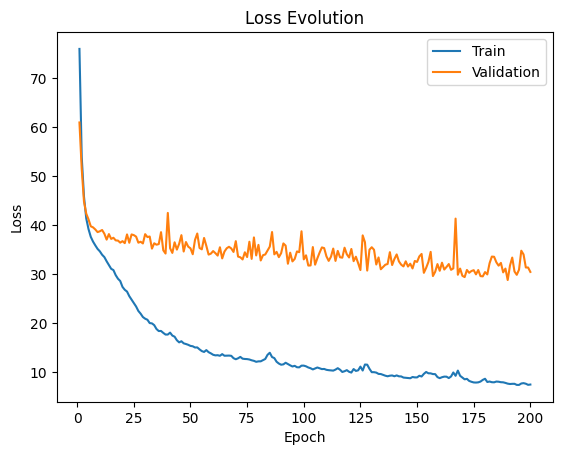

In [21]:
# evaluate the model (optional)
# Get the recorded loss values from history
loss_values = history.history['loss']
val_loss_values = history.history['val_loss']

# Create a figure and axis
fig, ax = plt.subplots()

# Plot the loss values
ax.plot(range(1, len(loss_values) + 1), loss_values)
ax.plot(range(1, len(val_loss_values) + 1), val_loss_values)
plt.legend(['Train', 'Validation'], loc='upper right')

# Set the plot title and labels
ax.set_title('Loss Evolution')
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')

# Show the plot
plt.show()

1/1 [==============================] - 0s 42ms/step


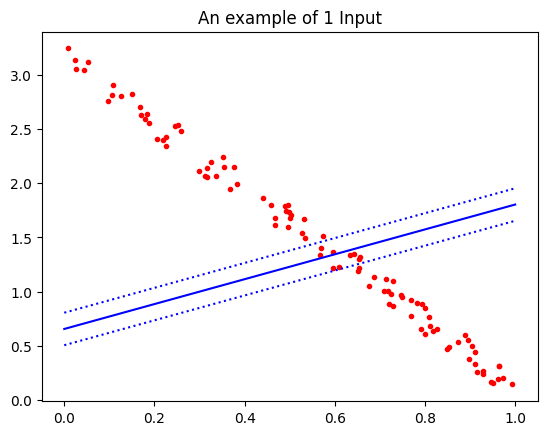

In [22]:
import matplotlib.pyplot as plt
import numpy as np

# Set the random seed
np.random.seed(12345)

# Initialize independent input linear equation (x_i, y_i)
x = np.random.rand(100).astype('float32')
y = -3 * x + 3 + np.random.rand(100).astype('float32') * 0.3

# Set input data to be (1,200) to fit the input layer of the neural network
x_test = np.hstack((x.reshape(1, 100), y.reshape(1, 100)))

# Put the test data into the model to predict the output
yhat = model.predict(x_test)

# Best fit line assuming e = 0. Construct the best fit line with y = Ax + b
# Set up x value range
x_bfl = np.linspace(0, 1, 100)

# Calculate corresponding y value range for the best fit line: y = Ax + b
y_bfl = x_bfl * yhat[0][0] + yhat[0][1]

# Calculate the parallel lines by adding/subtracting the random noise term
y_parallel_plus = y_bfl + 0.3/2
y_parallel_minus = y_bfl -  0.3/2

# Plot the test dataset
plt.scatter(x, y, marker='.', color='red')

# Plot the best fit line as a straight line
plt.plot(x_bfl, y_bfl, color='blue')

# Plot the parallel lines as dotted lines
plt.plot(x_bfl, y_parallel_plus, linestyle='dotted', color='blue')
plt.plot(x_bfl, y_parallel_minus, linestyle='dotted', color='blue')

plt.title('An example of 1 Input')
plt.show()

## Trial 4 of 5: K-fold validation

Epoch 1/200


13/13 [==============================] - 1s 11ms/step - loss: 10.3197 - accuracy: 0.8825 - val_loss: 32.8573 - val_accuracy: 0.6400
Epoch 2/200
13/13 [==============================] - 0s 2ms/step - loss: 8.7789 - accuracy: 0.9200 - val_loss: 31.4654 - val_accuracy: 0.6400
Epoch 3/200
13/13 [==============================] - 0s 2ms/step - loss: 7.6788 - accuracy: 0.9375 - val_loss: 30.8347 - val_accuracy: 0.6500
Epoch 4/200
13/13 [==============================] - 0s 2ms/step - loss: 7.2550 - accuracy: 0.9725 - val_loss: 29.9928 - val_accuracy: 0.6600
Epoch 5/200
13/13 [==============================] - 0s 2ms/step - loss: 7.0792 - accuracy: 0.9675 - val_loss: 29.8349 - val_accuracy: 0.6600
Epoch 6/200
13/13 [==============================] - 0s 3ms/step - loss: 6.9762 - accuracy: 0.9625 - val_loss: 29.7724 - val_accuracy: 0.6800
Epoch 7/200
13/13 [==============================] - 0s 3ms/step - loss: 6.9462 - accuracy: 0.9725 - val_loss: 30.4038 - val_accuracy: 0.6500
Epoch 8/200
13/1

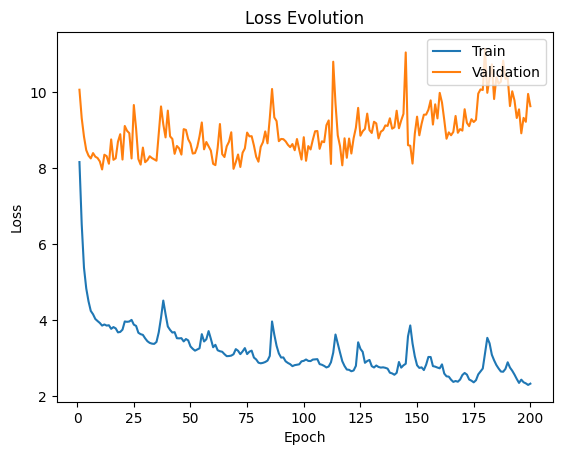

In [23]:
from sklearn.model_selection import KFold
import numpy as np

# Set the number of folds
n_folds = 5

# Instantiate the KFold object
kfold = KFold(n_folds, shuffle=True)

# Initialize lists to store per-fold metrics
train_losses = []
val_losses = []

# Iterate over the folds
for train_index, val_index in kfold.split(data_input):

    # Split the data
    X_train_fold, X_val_fold = data_input[train_index], data_input[val_index]
    y_train_fold, y_val_fold = data_output[train_index], data_output[val_index]

    # Re-compile the model (to reset weights)
    model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

    # Train the model
    history = model.fit(X_train_fold, 
                        y_train_fold, 
                        validation_data=(X_val_fold, y_val_fold), 
                        epochs=200, 
                        batch_size=32,)

    # Record the loss values
    train_losses.append(history.history['loss'])
    val_losses.append(history.history['val_loss'])

# Average the per-fold metrics
avg_train_loss = np.mean(train_losses, axis=0)
avg_val_loss = np.mean(val_losses, axis=0)

# Create a figure and axis
fig, ax = plt.subplots()

# Plot the loss values
ax.plot(range(1, len(avg_train_loss) + 1), avg_train_loss)
ax.plot(range(1, len(avg_val_loss) + 1), avg_val_loss)

plt.legend(['Train', 'Validation'], loc='upper right')

# Set the plot title and labels
ax.set_title('Loss Evolution')
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')

# Show the plot
plt.show()

1/1 [==============================] - 0s 50ms/step


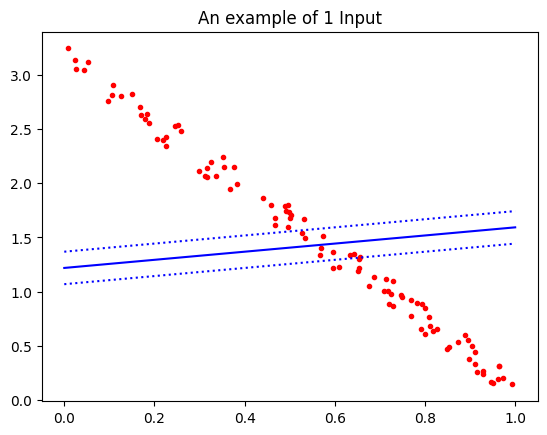

In [24]:
import matplotlib.pyplot as plt
import numpy as np

# Set the random seed
np.random.seed(12345)

# Initialize independent input linear equation (x_i, y_i)
x = np.random.rand(100).astype('float32')
y = -3 * x + 3 + np.random.rand(100).astype('float32') * 0.3

# Set input data to be (1,200) to fit the input layer of the neural network
x_test = np.hstack((x.reshape(1, 100), y.reshape(1, 100)))

# Put the test data into the model to predict the output
yhat = model.predict(x_test)

# Best fit line assuming e = 0. Construct the best fit line with y = Ax + b
# Set up x value range
x_bfl = np.linspace(0, 1, 100)

# Calculate corresponding y value range for the best fit line: y = Ax + b
y_bfl = x_bfl * yhat[0][0] + yhat[0][1]

# Calculate the parallel lines by adding/subtracting the random noise term
y_parallel_plus = y_bfl + 0.3/2
y_parallel_minus = y_bfl -  0.3/2

# Plot the test dataset
plt.scatter(x, y, marker='.', color='red')

# Plot the best fit line as a straight line
plt.plot(x_bfl, y_bfl, color='blue')

# Plot the parallel lines as dotted lines
plt.plot(x_bfl, y_parallel_plus, linestyle='dotted', color='blue')
plt.plot(x_bfl, y_parallel_minus, linestyle='dotted', color='blue')

plt.title('An example of 1 Input')
plt.show()

## Trial 5 of 5: simple neural network

In [25]:
## answer 1a
from keras.optimizers import SGD  # Import SGD optimizer from the keras.optimizers module
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf


from sklearn.model_selection import train_test_split

unit = 10 # this value should be the number of neurons in the layer
input_shape = 200 # this value should be the number of features in your dataset

# define the model
model = Sequential()
# input layer 
model.add(keras.Input(data_input.shape[1])) 
# hidden layer
model.add(Dense(units=8, 
                activation='sigmoid', ))
# hidden layer
model.add(Dense(units=data_output.shape[1])) #　data_output.shape[1] =  2 

print(model.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 8)                 1608      
                                                                 
 dense_11 (Dense)            (None, 2)                 18        
                                                                 
Total params: 1626 (6.35 KB)
Trainable params: 1626 (6.35 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [26]:
from keras.callbacks import History  # Import History callback

# compile the model(defining loss function for the NN)
# opt = SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer='sgd', loss='mse', metrics=['accuracy']) #mse: mean squared error

# Preprocess the data (optional)
X_train, X_test, y_train, y_test = train_test_split(data_input, 
                                                    data_output, 
                                                    test_size=0.2)

# Create a History callback to record loss values
history = History()

# train the model
model.fit(X_train, 
          y_train, 
          validation_data=(X_test, y_test), 
          validation_split=0.1,
          epochs=200, 
          batch_size=32,
          callbacks=[history],)

Epoch 1/200


13/13 [==============================] - 0s 9ms/step - loss: 29.7980 - accuracy: 0.6425 - val_loss: 29.2733 - val_accuracy: 0.6300
Epoch 2/200
13/13 [==============================] - 0s 2ms/step - loss: 26.5369 - accuracy: 0.6500 - val_loss: 26.7814 - val_accuracy: 0.6300
Epoch 3/200
13/13 [==============================] - 0s 2ms/step - loss: 24.5802 - accuracy: 0.6525 - val_loss: 25.1663 - val_accuracy: 0.6300
Epoch 4/200
13/13 [==============================] - 0s 2ms/step - loss: 23.2442 - accuracy: 0.6525 - val_loss: 24.0377 - val_accuracy: 0.6200
Epoch 5/200
13/13 [==============================] - 0s 2ms/step - loss: 22.3232 - accuracy: 0.6525 - val_loss: 23.2446 - val_accuracy: 0.6200
Epoch 6/200
13/13 [==============================] - 0s 2ms/step - loss: 21.5485 - accuracy: 0.6550 - val_loss: 22.6800 - val_accuracy: 0.6300
Epoch 7/200
13/13 [==============================] - 0s 2ms/step - loss: 21.0021 - accuracy: 0.6575 - val_loss: 22.2158 - val_accuracy: 0.6300
Epoch 8/200

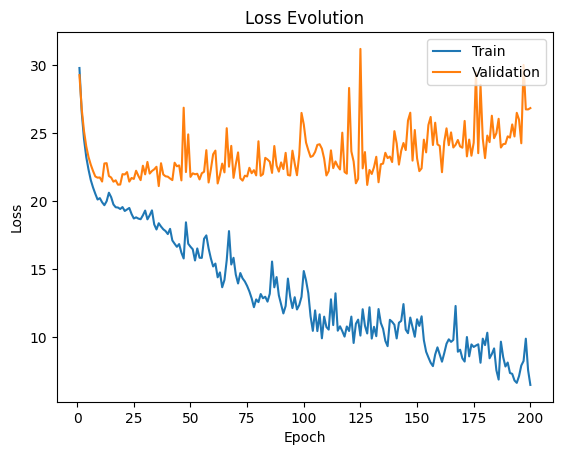

In [27]:
# evaluate the model (optional)
# Get the recorded loss values from history
loss_values = history.history['loss']
val_loss_values = history.history['val_loss']

# Create a figure and axis
fig, ax = plt.subplots()

# Plot the loss values
ax.plot(range(1, len(loss_values) + 1), loss_values)
ax.plot(range(1, len(val_loss_values) + 1), val_loss_values)
plt.legend(['Train', 'Validation'], loc='upper right')

# Set the plot title and labels
ax.set_title('Loss Evolution')
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')

# Show the plot
plt.show()

1/1 [==============================] - 0s 32ms/step


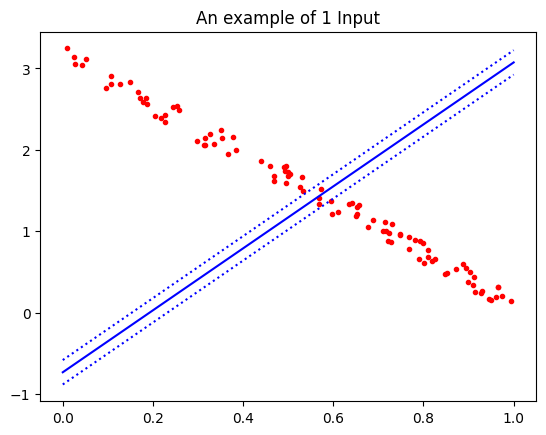

In [28]:
import matplotlib.pyplot as plt
import numpy as np

# Set the random seed
np.random.seed(12345)

# Initialize independent input linear equation (x_i, y_i)
x = np.random.rand(100).astype('float32')
y = -3 * x + 3 + np.random.rand(100).astype('float32') * 0.3

# Set input data to be (1,200) to fit the input layer of the neural network
x_test = np.hstack((x.reshape(1, 100), y.reshape(1, 100)))

# Put the test data into the model to predict the output
yhat = model.predict(x_test)

# Best fit line assuming e = 0. Construct the best fit line with y = Ax + b
# Set up x value range
x_bfl = np.linspace(0, 1, 100)

# Calculate corresponding y value range for the best fit line: y = Ax + b
y_bfl = x_bfl * yhat[0][0] + yhat[0][1]

# Calculate the parallel lines by adding/subtracting the random noise term
y_parallel_plus = y_bfl + 0.3/2
y_parallel_minus = y_bfl -  0.3/2

# Plot the test dataset
plt.scatter(x, y, marker='.', color='red')

# Plot the best fit line as a straight line
plt.plot(x_bfl, y_bfl, color='blue')

# Plot the parallel lines as dotted lines
plt.plot(x_bfl, y_parallel_plus, linestyle='dotted', color='blue')
plt.plot(x_bfl, y_parallel_minus, linestyle='dotted', color='blue')

plt.title('An example of 1 Input')
plt.show()

## Conclusion: All of these methods are all having large errors in their predictions. With luck we might produce some fitting lines with the model, but that does not indicate the model is accurate and useful. 

# Question 2

In this question, you need to use a neural network to make a classification of the below data.

In [29]:
from numpy import argmax
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from sklearn import datasets
import matplotlib.pyplot as plt

np.random.seed(1234)
iris = datasets.load_iris()
X = iris.data
y = iris.target

## Q2a

Split the data into training and testing sets at a ratio of $8:2$.


Consider three models:

- `model_A`: 1 dense layer (`relu`) with 3 units, followed by 1 dense layer (`softmax`)
- `model_B`: 1 dense layer (`relu`) with 10 units, followed by 1 dense layer (`softmax`)
- `model_C`: 2 dense layers (`relu`) with 10 units and then 8 units, followed by 1 dense layer (`softmax`)

We fix the model configurations:
`epoch = 150`,  `batch_size=10`, `loss="sparse_categorical_corssentropy"` and `metrics = ['accuracy']`.

Use the `adam` optimizer and batch normalization.

Train each model using the training set $10$ times. Which model gives the highest average test accuracy?

In [30]:
## answer 2a

# Preprocess the data (optional)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(120, 4) (30, 4) (120,) (30,)


Obtain unique labels from dataset without hardcoding: 

In [31]:
print(np.unique(y))
print(len(np.unique(y)))

[0 1 2]
3


## Trial 1/2 of Q2: for-loop without reset the model
We can see that the loss of model accumulated across different batch of training. 

In [32]:
from keras.models import Sequential
from keras.layers import Dense


input_shape = X_train.shape[1]
output_shape = len(np.unique(y))

# define the model_A
model_A = Sequential()
model_A.add(Dense(units=3, activation='relu', input_shape=(input_shape,)))
model_A.add(Dense(units=output_shape, activation='softmax'))

# define the model_B
model_B = Sequential()
model_B.add(Dense(units=10, activation='relu', input_shape=(input_shape,)))
model_B.add(Dense(units=output_shape, activation='softmax'))

# define the model_C
model_C = Sequential()
model_C.add(Dense(units=10, activation='relu', input_shape=(input_shape,)))
model_C.add(Dense(units=8, activation='relu'))
model_C.add(Dense(units=output_shape, activation='softmax'))


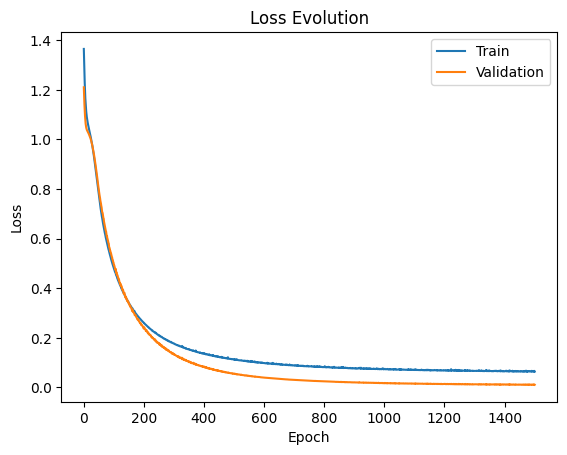

Test for <keras.src.engine.sequential.Sequential object at 0x7f93e7c7f520>:
Total number of runs: 10
Average test Accuracy: 0.997


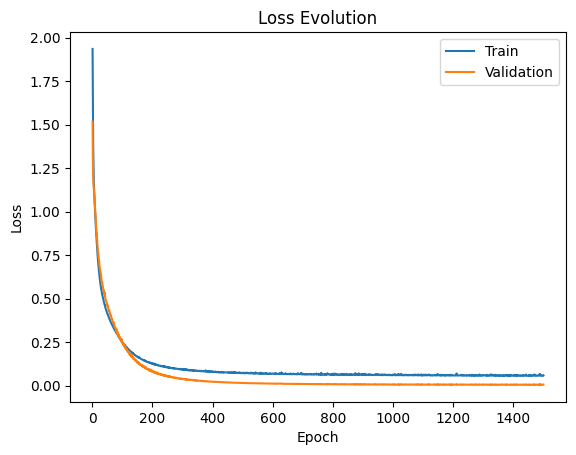

Test for <keras.src.engine.sequential.Sequential object at 0x7f93dbaa5ea0>:
Total number of runs: 10
Average test Accuracy: 1.000


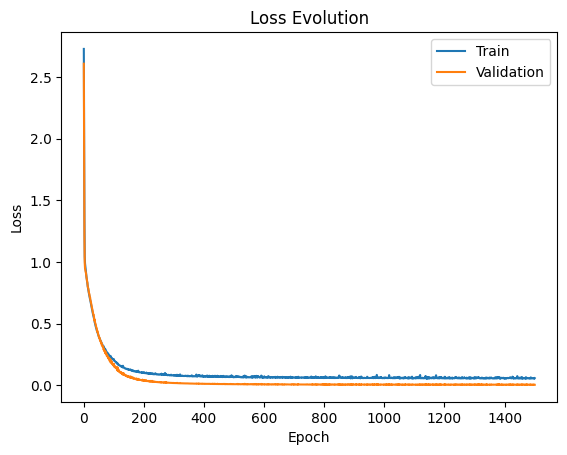

Test for <keras.src.engine.sequential.Sequential object at 0x7f93dbaa4c70>:
Total number of runs: 10
Average test Accuracy: 1.000


In [33]:
# write a function that pass a series of command that defines compile, train, fit, evaluate for any models
from keras.callbacks import History  # Import History callback

def test_accuracy_of_model(model):
    model.compile(optimizer='adam',
                  loss="sparse_categorical_crossentropy",
                  metrics = ['accuracy'])
    
    # fit the model 10 times and take the average of the accuracy
    accuaracy = 0
    num_of_run = 0
    history = History()
    
    for _ in range(10):
        model.fit(X_train, y_train, 
                  epochs=150, 
                  batch_size=10, 
                  validation_data=(X_test, y_test), 
                  validation_split=0.1,
                  verbose=0,
                  callbacks=[history],)
        loss, acc = model.evaluate(X_test, y_test, verbose=0)
        accuaracy += acc
        num_of_run += 1
    acc = accuaracy/num_of_run

    # print loss evolution
    loss_values = history.history['loss']
    val_loss_values = history.history['val_loss']

    # Create a figure and axis
    fig, ax = plt.subplots()

    # Plot the loss values
    ax.plot(range(1, len(loss_values) + 1), loss_values)
    ax.plot(range(1, len(val_loss_values) + 1), val_loss_values)
    plt.legend(['Train', 'Validation'], loc='upper right')

    # Set the plot title and labels
    ax.set_title('Loss Evolution')
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Loss')

    # Show the plot
    plt.show()

    print(f'Test for {model}:')
    print(f'Total number of runs: {num_of_run}')
    print('Average test Accuracy: %.3f' % acc)

test_accuracy_of_model(model_A)
test_accuracy_of_model(model_B)
test_accuracy_of_model(model_C)


## Trial 2 of 2: Initialize model within for-loop

We can see discontinuity in the loss evolution graph.

In [34]:
from keras.models import Sequential
from keras.layers import Dense


input_shape = X_train.shape[1]
output_shape = len(np.unique(y))

# define the model_A
def build_model_A():
    model_A = Sequential()
    model_A.add(Dense(units=3, activation='relu', input_shape=(input_shape,)))
    model_A.add(Dense(units=output_shape, activation='softmax'))
    return model_A

# define the model_B
def build_model_B():
    model_B = Sequential()
    model_B.add(Dense(units=10, activation='relu', input_shape=(input_shape,)))
    model_B.add(Dense(units=output_shape, activation='softmax'))
    return model_B

# define the model_C
def build_model_C():
    model_C = Sequential()
    model_C.add(Dense(units=10, activation='relu', input_shape=(input_shape,)))
    model_C.add(Dense(units=8, activation='relu'))
    model_C.add(Dense(units=output_shape, activation='softmax'))
    return model_C


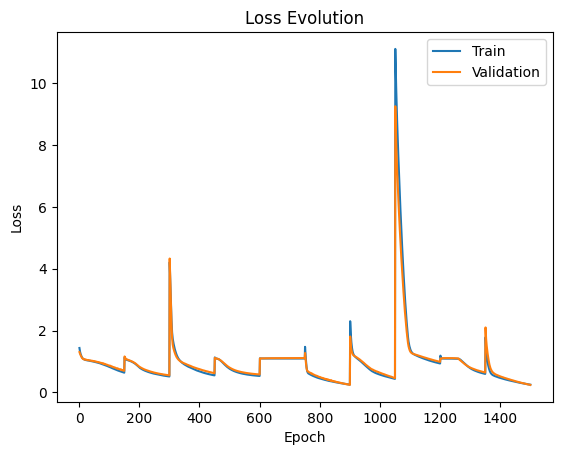

Test for <keras.src.engine.sequential.Sequential object at 0x7f93d4bce470>:
Total number of runs: 10
Average test Accuracy: 0.643


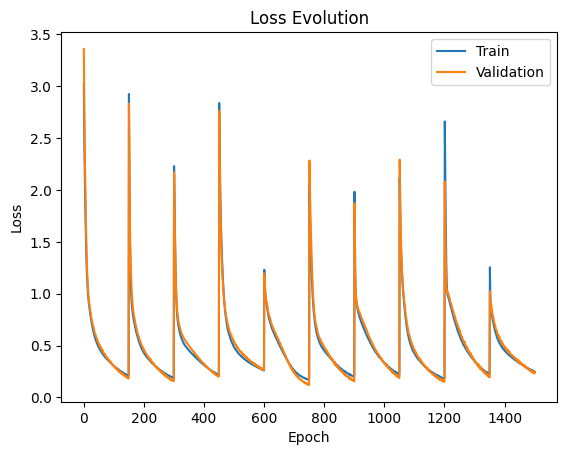

Test for <keras.src.engine.sequential.Sequential object at 0x7f93e7c658d0>:
Total number of runs: 10
Average test Accuracy: 1.000


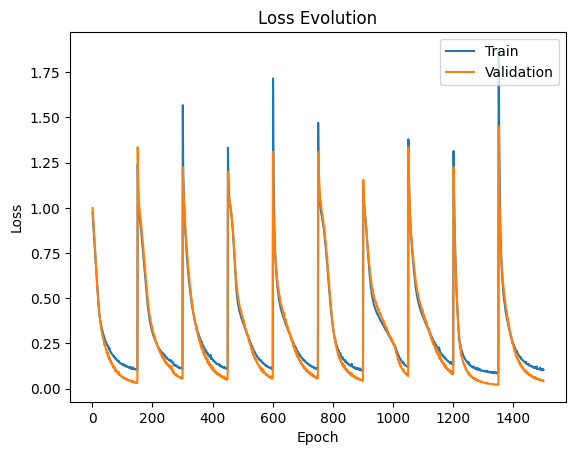

Test for <keras.src.engine.sequential.Sequential object at 0x7f93d49a6350>:
Total number of runs: 10
Average test Accuracy: 1.000


In [35]:
# write a function that pass a series of command that defines compile, train, fit, evaluate for any models
from keras.callbacks import History  # Import History callback

def test_accuracy_of_model(build_model):

    
    # fit the model 10 times and take the average of the accuracy
    accuaracy = 0
    num_of_run = 0
    history = History()
    
    for _ in range(10):
        model = build_model()
        
        model.compile(optimizer='adam',
                    loss="sparse_categorical_crossentropy",
                    metrics = ['accuracy'])
        
        model.fit(X_train, y_train, 
                  epochs=150, 
                  batch_size=10, 
                  validation_data=(X_test, y_test), 
                  validation_split=0.1,
                  verbose=0,
                  callbacks=[history],)
        loss, acc = model.evaluate(X_test, y_test, verbose=0)

        accuaracy += acc
        num_of_run += 1
    acc = accuaracy/num_of_run

    # print loss evolution
    loss_values = history.history['loss']
    val_loss_values = history.history['val_loss']

    # Create a figure and axis
    fig, ax = plt.subplots()

    # Plot the loss values
    ax.plot(range(1, len(loss_values) + 1), loss_values)
    ax.plot(range(1, len(val_loss_values) + 1), val_loss_values)
    plt.legend(['Train', 'Validation'], loc='upper right')

    # Set the plot title and labels
    ax.set_title('Loss Evolution')
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Loss')

    # Show the plot
    plt.show()

    print(f'Test for {model}:')
    print(f'Total number of runs: {num_of_run}')
    print('Average test Accuracy: %.3f' % acc)

test_accuracy_of_model(build_model_A)
test_accuracy_of_model(build_model_B)
test_accuracy_of_model(build_model_C)

# Conclusion: Model 3 is the most accurate model among three of them.